<a href="https://colab.research.google.com/github/seoyeon1359/Project/blob/main/%EC%86%90%EA%B8%80%EC%94%A8%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98(handwritten_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**손글씨 이미지를 분류하는 CNN 모델**
- 한글(가,다,사,아,카)만을 분류함.
- 하단 블로그의 모델을 참고하여 수정하였음.
- 이미지 데이터 수집은 폰트 이미지를 이용함.

[참고 블로그 링크](https://chancoding.tistory.com/93)

+)학습 및 실행을 위해 이미지 파일 폴더를 드라이브의 정해진 위치에 두어야함

# 초기설정

In [ ]:
#필요 라이브러리 import
from tensorflow.keras.preprocessing import image 
from keras.models import Sequential
from keras.layers import *
#from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import accuracy_score

In [ ]:
#드라이브 마운트-이미지 데이터를 가져오기 위해
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


자신의 드라이브의 Colab Notebooks에 하위폴더생성


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/handwritten_classification

/content/drive/MyDrive/Colab Notebooks/handwritten_classification


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/handwritten_classification'

In [ ]:
#이미지 데이터 경로 설정 및 폴더 확인
path = './img_dataset/'
trainFolderList = os.listdir(path+'train') 
testFolderList = os.listdir(path+'test')

train(총 50개)과 test(총 25개) 이미지가 나누어 저장되어있음

In [ ]:
trainFolderList,testFolderList, #순서가 같지 않으면 test데이터로 검증시 라벨링 오류 발생

(['aa', 'da', 'ga', 'ka', 'sa'], ['aa', 'da', 'ga', 'ka', 'sa'])

In [ ]:
#라벨링을 위한 딕셔너리 변수
word = {'aa' : 0, 'da' : 1, 'ga' : 2, 'ka' : 3, 'sa' : 4}

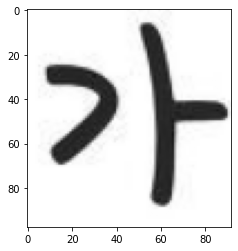

In [ ]:
# 이미지 확인하기
sample_img = plt.imread(path+'train/ga/ga (6).png')
plt.imshow(sample_img)
plt.show()

# 이미지 데이터 준비

In [ ]:
#데이터 가져오기+전처리 및 증강
trainDataGen = image.ImageDataGenerator(rescale=1./255, #정규화
                                 rotation_range = 30,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest' #변형후 공간 채우기
                                 )


In [ ]:
#디렉토리로부터 데이터를 가져와서 생성
trainGenSet = trainDataGen.flow_from_directory(
    path + 'train', 
    batch_size=10, #한 이미지당 10개 출력
    target_size=(28,28), #출력이미지 크기
    class_mode='categorical' #원-핫인코딩
)

Found 50 images belonging to 5 classes.


In [ ]:
testDataGen = ImageDataGenerator(rescale=1./255) #정규화만

In [ ]:
testGenSet = testDataGen.flow_from_directory(
    path + 'test',
    target_size=(28,28),
    batch_size=10,
    class_mode='categorical'
)

Found 25 images belonging to 5 classes.


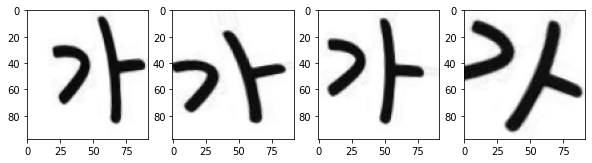

In [ ]:
#이미지 증강 결과 확인
cnt = 1
plt.figure(figsize=(10,10))
for img in trainDataGen.flow(sample_img[np.newaxis, ...]):#생성해서 img로
    plt.subplot(1, 4, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == 4:
        break
    cnt += 1

# 모델 생성 및 학습

In [ ]:
# 모델 구성
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same',
                input_shape=(28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#출력단
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))#5개의 클래스-softmax

In [ ]:
#모델 설정
model.compile(loss='categorical_crossentropy',#다중분류에서 사용/원-핫
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
#모델 학습
history=model.fit(
    trainGenSet,
    steps_per_epoch=4,#한 epoch당 스텝수
    epochs=100,
    validation_data=testGenSet,#테스트를 validation으로 사용함
    validation_steps=4, #epoch종료마다 검증하는 스텝수
)

Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 1.8309 - accuracy: 0.1250

4/4 [==============================] - 4s 1s/step - loss: 1.8309 - accuracy: 0.1250 - val_loss: 1.6129 - val_accuracy: 0.1600
Epoch 2/100
4/4 [==============================] - 0s 81ms/step - loss: 1.6854 - accuracy: 0.0750
Epoch 3/100
4/4 [==============================] - 0s 85ms/step - loss: 1.6199 - accuracy: 0.2500
Epoch 4/100
4/4 [==============================] - 0s 84ms/step - loss: 1.5995 - accuracy: 0.3250
Epoch 5/100
4/4 [==============================] - 0s 84ms/step - loss: 1.6801 - accuracy: 0.1500
Epoch 6/100
4/4 [==============================] - 0s 85ms/step - loss: 1.6203 - accuracy: 0.2000
Epoch 7/100
4/4 [==============================] - 0s 85ms/step - loss: 1.6286 - accuracy: 0.2000
Epoch 8/100
4/4 [==============================] - 0s 86ms/step - loss: 1.6058 - accuracy: 0.2000
Epoch 9/100
4/4 [==============================] - 0s 87ms/step - loss: 1.6233 - accuracy: 0.2000
Epoch 10/100
4/4 [==============================] - 0s 88ms/step - loss: 1.6112 - accuracy

# 학습 결과 확인

In [ ]:
scores = model.evaluate(testGenSet) 
print(scores) #loss와 accuracy

3/3 [==============================] - 0s 21ms/step - loss: 0.0934 - accuracy: 0.9600
[0.0934065729379654, 0.9599999785423279]


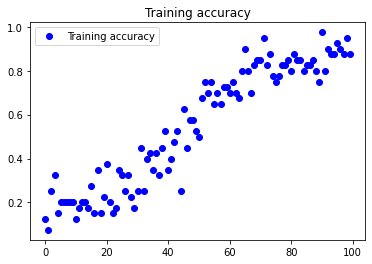

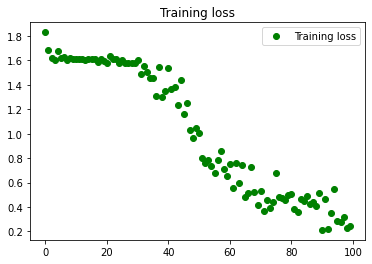

In [ ]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
#plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
word_text=['aa', 'da', 'ga', 'ka', 'sa']

0 aa
1/1 [==============================] - 0s 88ms/step
1 da
1/1 [==============================] - 0s 23ms/step
2 ga
1/1 [==============================] - 0s 21ms/step
3 ka
1/1 [==============================] - 0s 20ms/step
4 sa
1/1 [==============================] - 0s 19ms/step


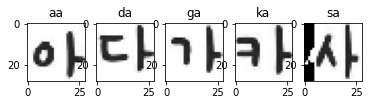

In [ ]:
for n,text in enumerate(word_text):
  print(n,text)
  sp=plt.subplot(1,5,n+1)
  test_img = image.load_img(path+"test/"+text+"/"+text +" (4).png", target_size=(28, 28))   
  x = image.img_to_array(test_img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #예측 결과 출력
  for x in range(0,5):
    if classes[0][x]==1:
      plt.title("This is".join([k for k, v in word.items() if v == x]))      
  plt.imshow(test_img)
plt.show();